## code playground: 
look here for example code

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date 


In [2]:
#convert the us indicator date to the filename type, using
#https://pynative.com/python-datetime-format-strftime/#:~:text=Below%20are%20the%20character%20codes%20to%20format%20the,of%20the%20weekday.%20Like%2C%20Monday%2C%20Tuesday%20More%20items
def convertxy():
    from dateutil import parser
    dt = parser.parse("Dec 21 2020  1:01PM")
    print(type(dt), dt)

In [3]:
#take string, Wednesday, August 17, 2022
#strip first three characters from first word to match file name by day
#strip first three characters from second word, to arrive at comparable

In [4]:
print(convertxy())

<class 'datetime.datetime'> 2020-12-21 13:01:00
None


how to access the limit order book files:

In [5]:
# Thu Aug 11 2022 05:39:53 GMT-0700 (Pacific Daylight Time)-MEANSHIFT.csv
x = pd.read_csv("lob_caps/Sat Sep 24 2022 11:10:07 GMT-0700 (Pacific Daylight Time)-MEANSHIFT.csv")
x.dtypes


mp           float64
timeStamp      int64
mean         float64
skew         float64
dtype: object

In [123]:
def getIndicators():
    return pd.read_csv("usIndicatorsFall22-fulls.csv")

In [124]:
print(getIndicators())

                             date      time                         indicator  \
0          Monday, August 1, 2022   6:00 AM             ism manufacturing pmi   
1         Tuesday, August 2, 2022   6:00 AM                jolts job openings   
2       Wednesday, August 3, 2022   6:00 AM         ism non manufacturing pmi   
3        Thursday, August 4, 2022   4:30 AM                  balance of trade   
4          Friday, August 5, 2022   4:30 AM                 non farm payrolls   
5      Wednesday, August 10, 2022   4:30 AM               core inflation rate   
6      Wednesday, August 10, 2022   4:30 AM                inflation rate yoy   
7       Thursday, August 11, 2022   4:30 AM                           ppi mom   
8         Friday, August 12, 2022   6:00 AM  michigan consumer sentiment pref   
9        Tuesday, August 16, 2022   4:30 AM                  building permits   
10     Wednesday, August 17, 2022   4:30 AM                  retail sales mom   
11     Wednesday, August 17,

In [8]:
ind = pd.read_csv("usIndicatorsFall22-fulls.csv")
t = ['date', 'time']
ind[t].dtypes

date    object
time    object
dtype: object

In [9]:
ind['indicator'].unique()

array(['ism manufacturing pmi', 'jolts job openings',
       'ism non manufacturing pmi', 'balance of trade',
       'non farm payrolls', 'core inflation rate', 'inflation rate yoy',
       'ppi mom', 'michigan consumer sentiment pref', 'building permits',
       'retail sales mom', 'fomc minutes', 'durable goods orders mom',
       'personal income mom', 'personal spending mom',
       'fed chair powell speech', 'fomc economic projections',
       'fed press conference', 'core inflation rate yoy',
       'buildling permits', 'Non Farm Payrolls'], dtype=object)

gather all data files per announcement

In [10]:
# def loadCSV(type, fileName):
#     if type == "caps":
#         sl = "./lob_caps/"
#         loc= sl+ fileName #+ "-CAPS.csv"
#     df = pd.read_csv(loc)
#     return df

get limit order book for a date string

In [184]:
def getlob(csv):
        print("GETTING LOB FILE FOR: csv named ",csv)
        csv = "lob_caps/" + csv
        df = pd.read_csv(csv)
            # print("\tfor ", type, df.columns)
        return df

get CAPS for indicator date. Searches for filenames of a certain date. Returns a dataframe from the dated file, with the elaborated date. 

In [185]:
import os

def getCAPSByDateAndType(date, type, edt ):  #returns a dict, date + df caps for that date, then extended date and time
                                # print("for type, ", type)
    for root, dirs, files in os.walk("."):
        for filename in files:
            if date in filename :
                if type in filename:
                    print("GET CAPS FOR: ", date  , " : ", filename)
                                 # print("returning, ", filename )
                    obj = {"date":date, "df":getlob(filename), "time":edt}
                                # print("getting caps from  ", filename ,obj)
                    return obj
    

primary study, study entry point. Iterates indicator file, returns data frame per indicator announcement, based on the type of data you wish. Supply argument "CAPS" to get capitalization data. 

will grab the indicator first, then grab the capitalization data on the day of that indicator

In [186]:
def iterateByType(type):
    # print("for type, ", type)
    data = getIndicators() #indicators file read, access all indicator data per event/announcement
    result = []
    for row, val in data.iterrows():
        s1 = val['date'].replace(','  , '')
        ss = s1.split(" ")
        day  = ss[0][0:3]
        mon = ss[1][0:3]
        num = ss[2]
        hr = val['time']
        if int(num) <10:
            num = "0"+num
        yr = ss[3]
        l = day + " " + mon + " " + num #+ " " + hr
        extendedDateTime = day + " " + mon + " " + num + " " + hr + " " +yr
        print("FOR INDICATOR, DATED: ",extendedDateTime)
        result.append(getCAPSByDateAndType(l, type, extendedDateTime)) #returns df/caps and the date associated    
    return result

#### study one: how does the announcement impact the accumulation of the commodity?
separate one data frame into two, based on announcement time

In [187]:
def studyCorrelations(cArr):
    print(len(cArr))

    for i in range(len(cArr)):
        print(cArr[i]["date"], "CAPS data: ")
        print(cArr[i]["corrDf"])

In [130]:
def convertMo(month):
    if month =="Aug":
        return "08"
    if month == "Sep":
        return "09"
    if month == "Oct":
        return "10"
    if month == "Nov":
        return "11"

In [65]:
# # from dateutil import parser

# def convertIndicatorDateToEpoch(original):
#     print("orig: ", original) #Thu Aug 11 4:30 AM
#     #date, time: "Monday, August 1, 2022",6:00 AM
#     newstring = original.split(" ") #must format from  Thu Aug 11 4:30 AM --to-- Thu  08 11 2022 4:30 AM
#     month = convertMo(newstring[1])
#     e = newstring[1] + " " + month + " " + newstring[2] + " " + "2022" + " " + newstring[3] + " " + newstring[4]
#     print("CTE ", original," ==> ", e)
#     # dt = parser.parse(e)
#     dt2 = parser.parse(e)
#     print(e , " ----- ", dt2, "\n\n")
#     return dt2

In [188]:
from dateutil import parser
import datetime
import time

def convertIndicatorDateToEpoch(original):
    # print("original ", original) #Thu Aug 11 4:30 AM 2022
    re =time.strptime(original, "%a %b %d %I:%M %p %Y")
    ep = time.mktime(re)
    # print("TS ", int(ep))   #1660311116579
    return int(ep)

In [189]:
import time
from time import gmtime, strptime
def demarcateByAnnounceTime():
    obj = iterateByType("CAPS")
    # print(obj)#  , obj["df"])
    corrArray = []
    # visualizeAnnoucementBuild = []
    for i in range(len(obj)):
        if obj[i] is not None:
            # print(obj[i]["df"]["mp"].head(2))
            # print(type(obj[i]["df"].corr()))
            l = obj[i]["df"].corr()
            date = obj[i]["time"]
            indEpoch = convertIndicatorDateToEpoch(date)#.split(" ") # turn this to epoch Mon Aug 01 6:00 AM
            buildDict = {"date":date , "indicatorAnnouncementEpoch":indEpoch}
            # visualizeAnnoucementBuild.append(buildDict) #date of announcement and its epoch value
            dict = {"corrDf": l, "date":date }
            corrArray.append(dict)
    # visualizeAnnoucementBuilds(visualizeAnnoucementBuild)
    studyCorrelations(corrArray)

In [190]:
demarcateByAnnounceTime()

FOR INDICATOR, DATED:  Mon Aug 01 6:00 AM 2022
FOR INDICATOR, DATED:  Tue Aug 02 6:00 AM 2022
FOR INDICATOR, DATED:  Wed Aug 03 6:00 AM 2022
FOR INDICATOR, DATED:  Thu Aug 04 4:30 AM 2022
FOR INDICATOR, DATED:  Fri Aug 05 4:30 AM 2022
FOR INDICATOR, DATED:  Wed Aug 10 4:30 AM 2022
FOR INDICATOR, DATED:  Wed Aug 10 4:30 AM 2022
FOR INDICATOR, DATED:  Thu Aug 11 4:30 AM 2022
GET CAPS FOR:  Thu Aug 11  :  Thu Aug 11 2022 05:39:53 GMT-0700 (Pacific Daylight Time)-CAPS.csv
GETTING LOB FILE FOR: csv named  Thu Aug 11 2022 05:39:53 GMT-0700 (Pacific Daylight Time)-CAPS.csv
FOR INDICATOR, DATED:  Fri Aug 12 6:00 AM 2022
GET CAPS FOR:  Fri Aug 12  :  Fri Aug 12 2022 06:31:51 GMT-0700 (Pacific Daylight Time)-CAPS.csv
GETTING LOB FILE FOR: csv named  Fri Aug 12 2022 06:31:51 GMT-0700 (Pacific Daylight Time)-CAPS.csv
FOR INDICATOR, DATED:  Tue Aug 16 4:30 AM 2022
GET CAPS FOR:  Tue Aug 16  :  Tue Aug 16 2022 05:46:44 GMT-0700 (Pacific Daylight Time)-CAPS.csv
GETTING LOB FILE FOR: csv named  Tue Au

**Iterate Indicator dataframe by index**

provide an index location in the indicator dataframe, and get back the indicator, with information

retrieve all csv data per row in indicators

In [ ]:
#read into ind df, get time of the release, use date to retrieve a file name, using ls array, find day string in that array, use result to grab a file

## Code Graveyard

In [ ]:
# import os

# def getFilesByDateOf(d ):
#     for root, dirs, files in os.walk("."):
#         for s1 in files:
#             if d in s1 :
#                 # print("match ", d, " : ", s1)
#                 m = "MEANSHIFT"
#                 c = "CAPS"
#                 mt = "MATCH"
#                 if m in s1:
#                     getlob(m, s1)
#                 elif c in s1:
#                     getlob(c, s1)
#                 elif mt in s1:
#                     getlob(mt, s1)
#     return 0

In [ ]:
# # !ls lob_caps/
# f = loadCSV("caps", 'Fri Aug 12 2022 06:31:51 GMT-0700 (Pacific Daylight Time)-CAPS.csv')
# f.head()

In [ ]:
def iterateIndforIndex(index):
    frame = ind.loc[index]
    
    return frame

t = iterateIndforIndex(0)
t.head()

date         Monday, August 1, 2022
time                        6:00 AM
indicator     ISM Manufacturing PMI
actual                         52.8
previous                       53.0
Name: 0, dtype: object

## get time between
between start or given start, and limit, as defined by announcement time
1. first output, from .loc[0] to time of announcement, then
2. from announcement as .loc[0] to end of file

to demonstrate the order build, then the impact of the announcement, so we use the announcement as a pillar to the study, running orders up to it, taking that corr, then studying the order profile after, as corr

In [ ]:
# from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.between_time.html

In [ ]:
for row, val in ind.iterrows():
    s1 = val['date'].replace(','  , '')
    ss = s1.split(" ")
    day  = ss[0][0:3]
    mon = ss[1][0:3]
    num = ss[2]
    if int(num) <10:
        num = "0"+num
    yr = ss[3]
    l = day + " " + mon + " " + num
    print(l, " ", val['indicator'])
    res = getFilesByDateOf(l)

Mon Aug 01   ISM Manufacturing PMI
Tue Aug 02   JOLTS Job Openings
Wed Aug 03   ISM Non Manufacturing PMI
Thu Aug 04   Balance of Trade
Fri Aug 05   Non Farm Payrolls
Wed Aug 10   Core Inflation Rate
Wed Aug 10   Inflation Rate YoY
Thu Aug 11   PPI MoM


TypeError: getlob() takes 1 positional argument but 2 were given

can't locate the proper data given the match of file and announcement time, can't locate the proper match between the time of announcement and the data in the CAPS files. 

FOR INDICATOR, DATED:  Mon Aug 01 6:00 AM 2022
FOR INDICATOR, DATED:  Tue Aug 02 6:00 AM 2022
FOR INDICATOR, DATED:  Wed Aug 03 6:00 AM 2022
FOR INDICATOR, DATED:  Thu Aug 04 4:30 AM 2022
FOR INDICATOR, DATED:  Fri Aug 05 4:30 AM 2022
FOR INDICATOR, DATED:  Wed Aug 10 4:30 AM 2022
FOR INDICATOR, DATED:  Wed Aug 10 4:30 AM 2022
FOR INDICATOR, DATED:  Thu Aug 11 4:30 AM 2022
GET CAPS FOR:  Thu Aug 11  :  Thu Aug 11 2022 05:39:53 GMT-0700 (Pacific Daylight Time)-CAPS.csv
GETTING LOB FILE FOR: csv named  Thu Aug 11 2022 05:39:53 GMT-0700 (Pacific Daylight Time)-CAPS.csv
FOR INDICATOR, DATED:  Fri Aug 12 6:00 AM 2022
GET CAPS FOR:  Fri Aug 12  :  Fri Aug 12 2022 06:31:51 GMT-0700 (Pacific Daylight Time)-CAPS.csv
GETTING LOB FILE FOR: csv named  Fri Aug 12 2022 06:31:51 GMT-0700 (Pacific Daylight Time)-CAPS.csv
FOR INDICATOR, DATED:  Tue Aug 16 4:30 AM 2022
GET CAPS FOR:  Tue Aug 16  :  Tue Aug 16 2022 05:46:44 GMT-0700 (Pacific Daylight Time)-CAPS.csv
GETTING LOB FILE FOR: csv named  Tue Au

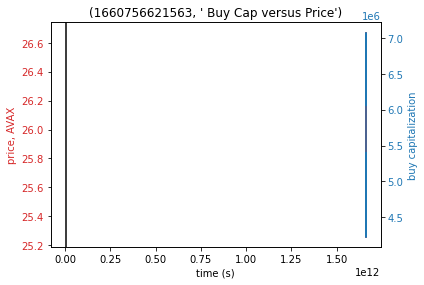

start time:  1660756621563
end time:  1660842042460
date of data:  Wed Aug 17 

Announcement time:  1661340600


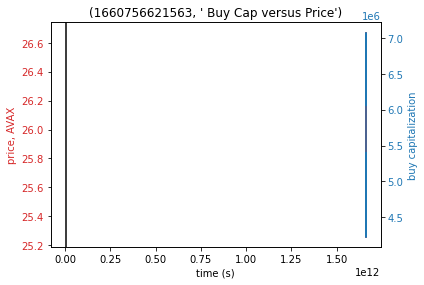

start time:  1661355849950
end time:  1661448267706
date of data:  Wed Aug 24 

Announcement time:  1661513400


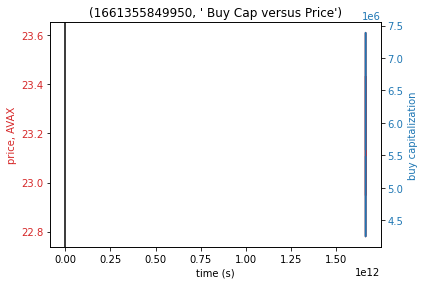

start time:  1661520441572
end time:  1661635166818
date of data:  Fri Aug 26 

Announcement time:  1661513400


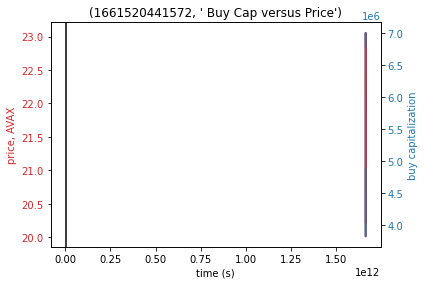

start time:  1661520441572
end time:  1661635166818
date of data:  Fri Aug 26 

Announcement time:  1661518800


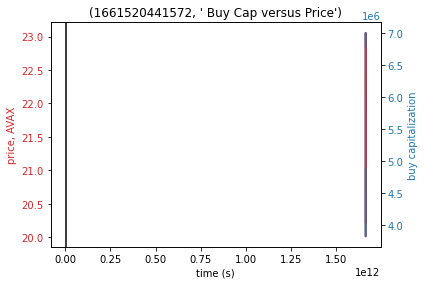

start time:  1661520441572
end time:  1661635166818
date of data:  Fri Aug 26 



TypeError: 'NoneType' object is not subscriptable

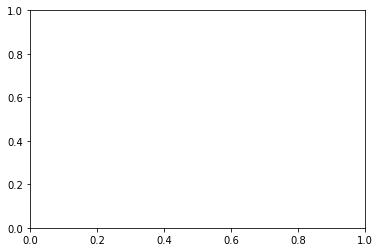

In [200]:
import datetime
def demarcateByAnnounceTime():
    dfArray = iterateByType("CAPS")
    # print("CAPS array: \n",len(dfArray))
    #now iterate the array, and per caps result, draw a chart with a line and the caps series(53)
    for i in range(len(dfArray)):
        if i > 9:
            if isinstance(dfArray[i], dict):
                # print(i, "iterated 1, ",  dfArray[i], "iterated 2, ", type(dfArray[i])) #every item is a dict
                
                print("start time: ", dfArray[i]["df"]["time"].min())
                print("end time: ", dfArray[i]["df"]["time"].max())
                print("date of data: ", dfArray[i]["date"], "\n")
                
                # print(dfArray[i]["df"]["bc"]) #access members of the dictionary
        #'bc', 'ac', 'tbv', 'tav', 'time', 'mp', 'minBid'
                #time (mp vs bc) / time (mp vs ac)
                
                data1 = dfArray[i]["df"]['mp']
                data2 = dfArray[i]["df"]['bc']
                t= dfArray[i]["df"]['time']
                ai = dfArray[i]["time"]
                fig, ax1 = plt.subplots()
                tt = i + 1
                if isinstance(dfArray[tt]["time"], str):
                    indEpoch = convertIndicatorDateToEpoch(dfArray[tt]["time"])#.split(" ") # turn this to epoch Mon Aug 01 6:00 AM
                    print("Announcement time: ",indEpoch)
                color = 'tab:red'
                ax1.set_xlabel('time (s)')
                ax1.set_ylabel('price, AVAX', color=color)
                ax1.plot(t, data1, color=color)
                ax1.tick_params(axis='y', labelcolor=color)

                ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

                color = 'tab:blue'
                ax2.set_ylabel('buy capitalization', color=color)  # we already handled the x-label with ax1
                ax2.plot(t, data2, color=color)
                ax2.tick_params(axis='y', labelcolor=color)

                fig.tight_layout()  # otherwise the right y-label is slightly clipped
                e = dfArray[i]["df"]['time'].loc[0]   #datetime.datetime.fromtimestamp(
                comb = e ," Buy Cap versus Price" #.strftime('%m-%d')
                plt.title(comb)
                #add vertical line at x=4
                if indEpoch:
                    plt.axvline(x=indEpoch, color='black', linestyle='-')
                plt.show()
            
        
        
        
demarcateByAnnounceTime()